In [208]:
#import all necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

from sklearn import preprocessing
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans



In [84]:
df=pd.read_csv(r"E:\portfolio_projects\4_online_retail\OnlineRetail.csv",encoding='latin1')

In [85]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [86]:
df.shape


(541909, 8)

In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [88]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [89]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

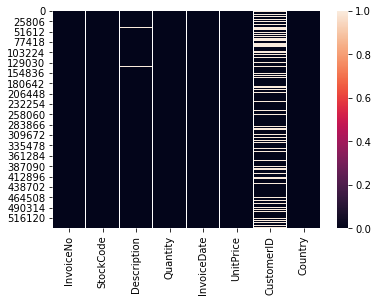

In [90]:
sns.heatmap(df.isnull())


In [91]:
#remove the null values
df=df.dropna()

In [92]:
#calculate the total amount
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=6, column = 'TotalAmount', value=TotalAmount)


In [93]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,10.20,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12.60,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,16.60,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,16.60,12680.0,France


<AxesSubplot:>

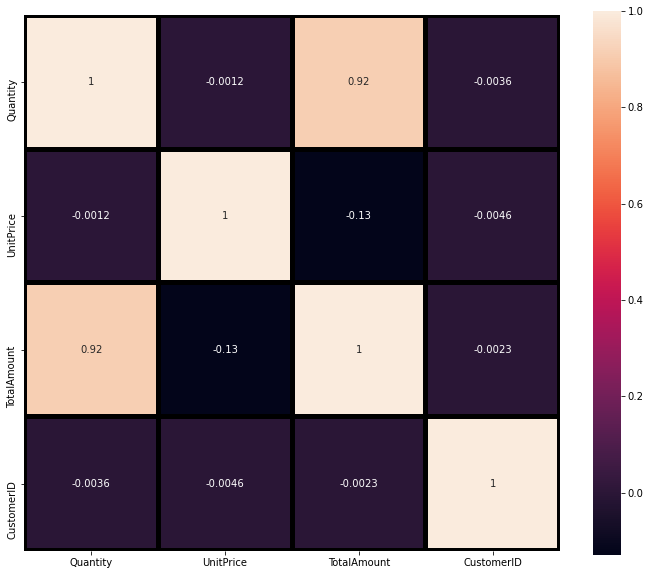

In [94]:
#correlation matrix
df_corr=df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(df_corr,square=True,annot=True,linewidths=4,linecolor='k')


In [95]:
#convert datatype pf the required columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#split date and time
df['month']= pd.to_datetime(df['InvoiceDate']).dt.month
#df['day'] = pd.to_datetime(df['InvoiceDate']).dt.dayofweek
df['day_number'] = pd.to_datetime(df['InvoiceDate']).dt.day
df['year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour
df['m_y']=pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

df['m_y']=df['m_y'].astype(str)


In [96]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,10.20,12680.0,France,9,12,2011,12,2011-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09


In [97]:
#finding unique values of certain columns
df['year'].unique()



array([2010, 2011], dtype=int64)

In [98]:
df['month'].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 12,  4, 11], dtype=int64)

In [99]:
#create a new column showing a specific number with respect to each country
df['Country_Category']=df["Country"].astype('category').cat.codes
df['InvoiceNo']=df["InvoiceNo"].astype('category').cat.codes
df['StockCode']=df["StockCode"].astype('category').cat.codes
df['Description']=df["Description"].astype('category').cat.codes
df['Description']=df["Description"].astype('category').cat.codes


In [100]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,2011-09-12 12:50:00,0.85,10.20,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541907,18535,2087,700,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


In [101]:
#create a dataframe showing the number represented by each country
a=df['Country'].unique()
b=df['Country_Category'].unique()
data = a,b
Countries = pd.DataFrame(data=data)


In [102]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,2011-09-12 12:50:00,0.85,10.20,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541907,18535,2087,700,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


In [103]:
Countries

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,United Kingdom,France,Australia,Netherlands,Germany,Norway,EIRE,Switzerland,Spain,Poland,...,Saudi Arabia,Czech Republic,Canada,Unspecified,Brazil,USA,European Community,Bahrain,Malta,RSA
1,35,13,0,23,14,24,10,32,30,25,...,28,8,5,36,4,33,11,2,22,27


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


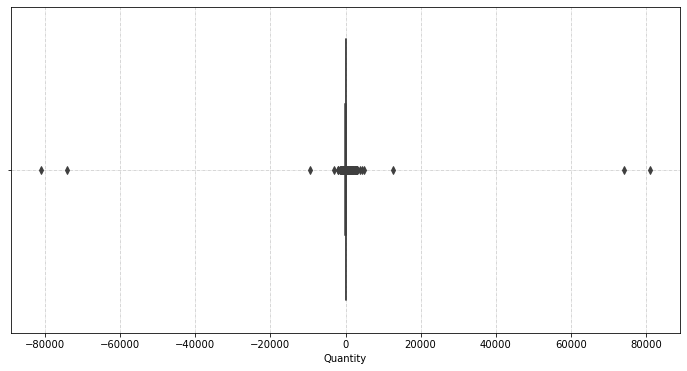

In [104]:
#boxplot of Quantity
plt.figure(figsize = (12,6))
sns.boxplot(df['Quantity'],data=df)
plt.xlabel("Quantity")
plt.grid(linestyle='-.',linewidth = .5)


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


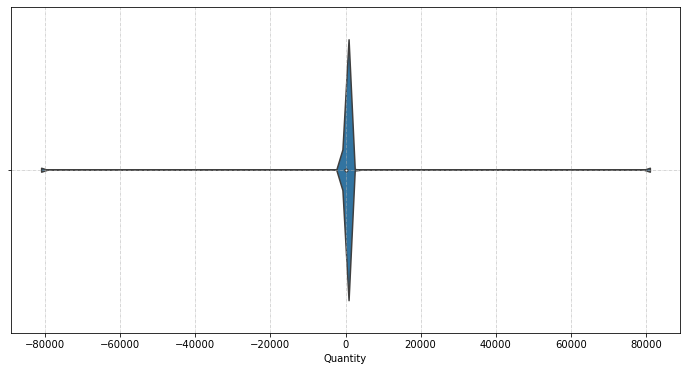

In [105]:
#violin plot of Quantity
plt.figure(figsize = (12,6))
sns.violinplot(df['Quantity'],data=df)
plt.xlabel("Quantity")
plt.grid(linestyle='-.',linewidth = .5)


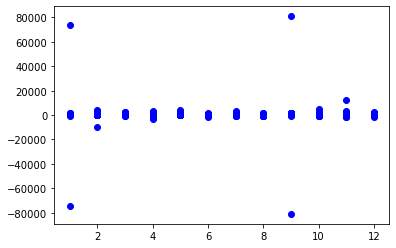

In [106]:
#scatter plot of quantity vs month
plt.scatter(df['month'],df['Quantity'],color="blue")
plt.show()


### removing outliers of Quantity 

In [107]:

max_quantity=df['Quantity'].quantile(0.90)


In [108]:
a1=df[df['Quantity']>max_quantity]


In [109]:
min_quantity=df['Quantity'].quantile(0.10)


In [110]:
b1=df[df['Quantity']<min_quantity]


In [111]:
df=df[(df['Quantity']<max_quantity) & (df['Quantity']>min_quantity)]


In [112]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,2011-09-12 12:50:00,0.85,10.20,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541907,18535,2087,700,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


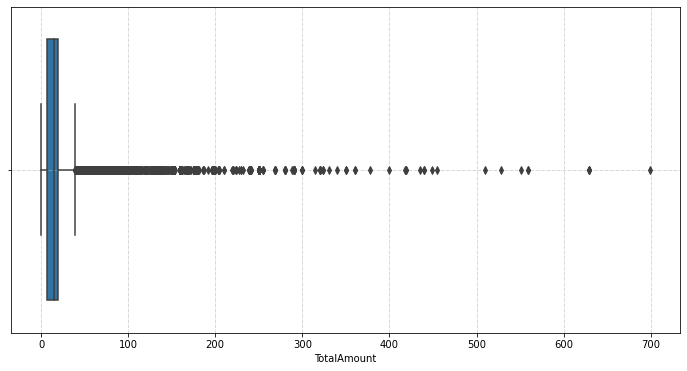

In [113]:
#boxplot of TotalAmount
plt.figure(figsize = (12,6))
sns.boxplot(df['TotalAmount'],data=df)
plt.xlabel("TotalAmount")
plt.grid(linestyle='-.',linewidth = .5)


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


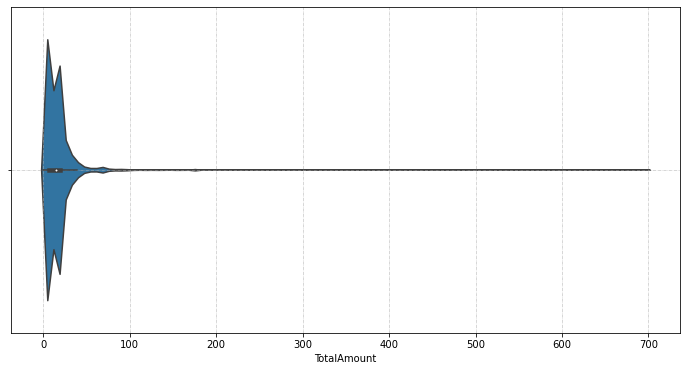

In [114]:
#violin plot of TotalAmount
plt.figure(figsize = (12,6))
sns.violinplot(df['TotalAmount'],data=df)
plt.xlabel("TotalAmount")
plt.grid(linestyle='-.',linewidth = .5)


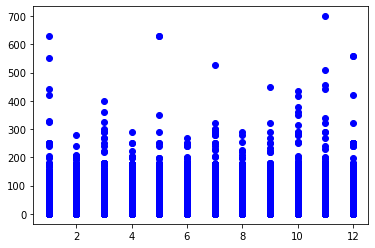

In [115]:
#scatter plot of TotalAmount vs month
plt.scatter(df['month'],df['TotalAmount'],color="blue")
plt.show()


### removing outliers of TotalAmount


In [116]:
max_TotalAmount=df['TotalAmount'].quantile(0.92)

In [117]:
a2=df[df['TotalAmount']>max_TotalAmount]

In [118]:
min_TotalAmount=df['TotalAmount'].quantile(0.08)

In [119]:
b2=df[df['TotalAmount']<min_TotalAmount]

In [120]:
df=df[(df['TotalAmount']<max_TotalAmount) & (df['TotalAmount']>min_TotalAmount)]

In [121]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,2263,12,2011-09-12 12:50:00,0.85,10.20,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541907,18535,2087,700,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


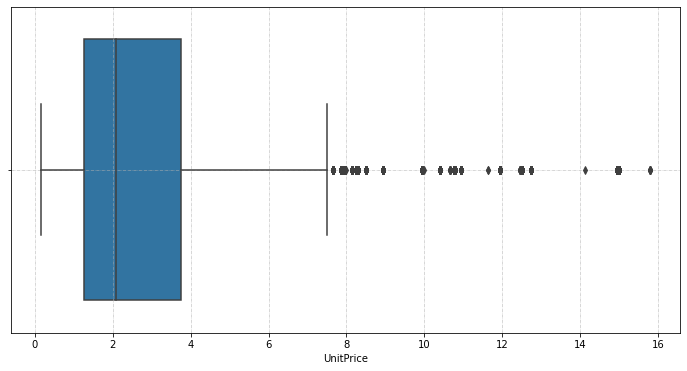

In [122]:

#boxplot of UnitPrice
plt.figure(figsize = (12,6))
sns.boxplot(df['UnitPrice'],data=df)
plt.xlabel("UnitPrice")
plt.grid(linestyle='-.',linewidth = .5)


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


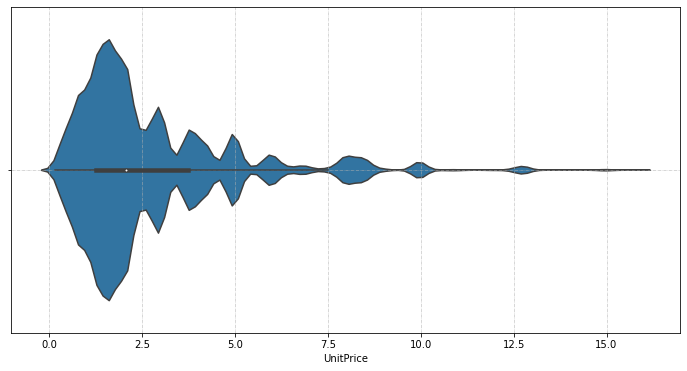

In [123]:

#violin plot of UnitPrice
plt.figure(figsize = (12,6))
sns.violinplot(df['UnitPrice'],data=df)
plt.xlabel("UnitPrice")
plt.grid(linestyle='-.',linewidth = .5)


In [124]:

#removing outliers of UnitPrice
max_UnitPrice=df['UnitPrice'].quantile(0.85)
a2=df[df['UnitPrice']>max_UnitPrice]
min_UnitPrice=df['UnitPrice'].quantile(0.15)
b2=df[df['UnitPrice']<min_UnitPrice]
df=df[(df['UnitPrice']<max_UnitPrice) & (df['UnitPrice']>min_UnitPrice)]


Text(0, 0.5, 'Quantity')

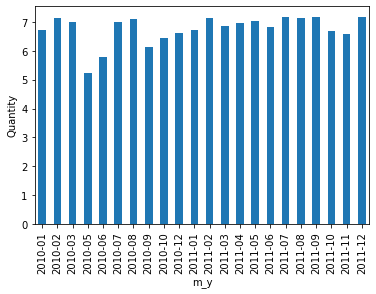

In [125]:

#bargraph of month wise quantity
df.groupby(['m_y'])['Quantity'].mean().plot(kind='bar')
plt.ylabel('Quantity')


Text(0, 0.5, 'UnitPrice')

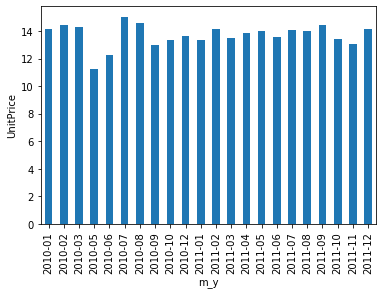

In [126]:

#bargraph of month wise TotalAmount
df.groupby(['m_y'])['TotalAmount'].mean().plot(kind='bar')
plt.ylabel('UnitPrice')


Text(0, 0.5, 'Quantity')

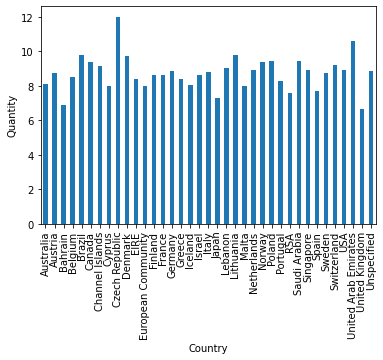

In [127]:

#bargraph of country wise quantity
df.groupby(['Country'])['Quantity'].mean().plot(kind='bar')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

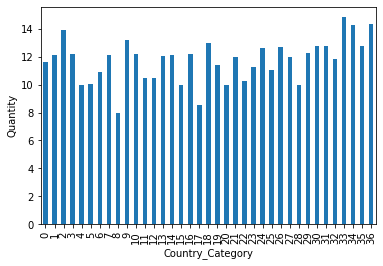

In [128]:

#bargraph of country wise hourly orders
df.groupby(['Country_Category'])['hour'].mean().plot(kind='bar')
plt.ylabel('Quantity')


Text(0, 0.5, 'UnitPrice')

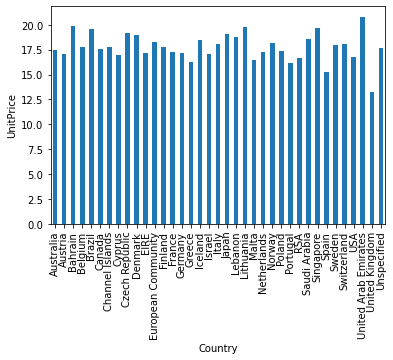

In [129]:

#bargraph of country wise TotalAmount
df.groupby(['Country'])['TotalAmount'].mean().plot(kind='bar')
plt.ylabel('UnitPrice')


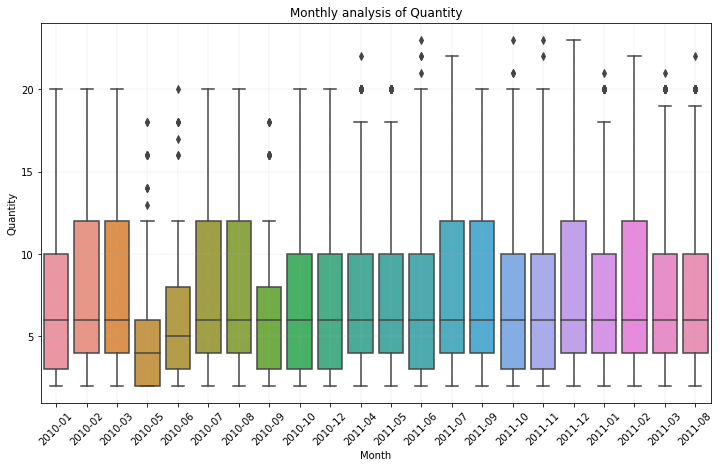

In [130]:

#boxplot of Quantity for monthly analysis
plt.figure(figsize=(12,7))
sns.boxplot(x='m_y', y = 'Quantity', data = df)
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('Quantity')
plt.title("Monthly analysis of Quantity")
plt.grid(linestyle='-.',linewidth = .2)


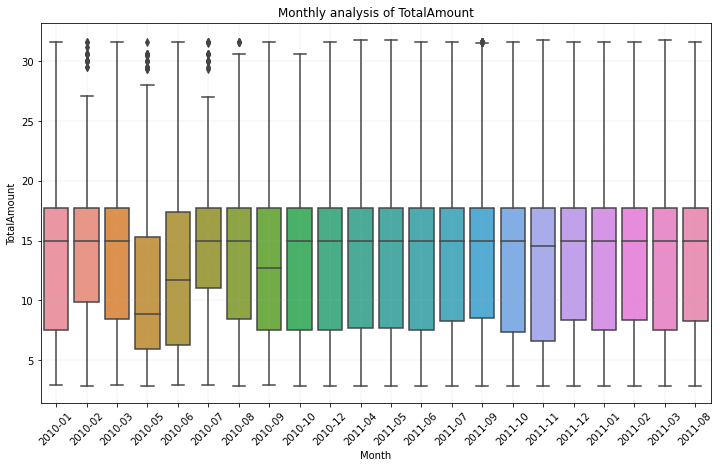

In [131]:

#boxplot of TotalAmount for monthly analysis
plt.figure(figsize=(12,7))
sns.boxplot(x='m_y', y = 'TotalAmount', data = df)
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('TotalAmount')
plt.title("Monthly analysis of TotalAmount")
plt.grid(linestyle='-.',linewidth = .2)


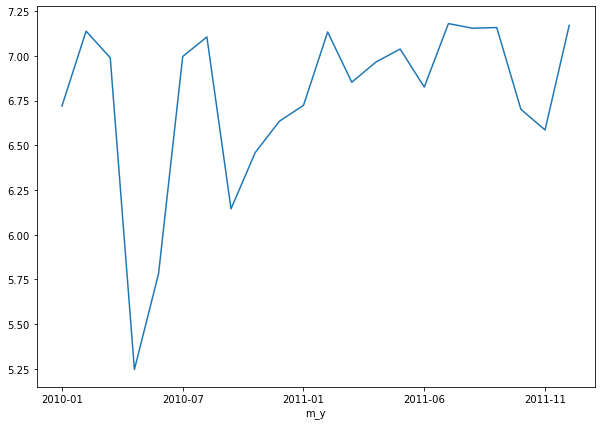

In [132]:

#linegraph of month vs quantity
fig, ax = plt.subplots(figsize=(10,7))
df.groupby(['m_y'])['Quantity'].mean().plot(ax=ax)
plt.show(fig,ax)


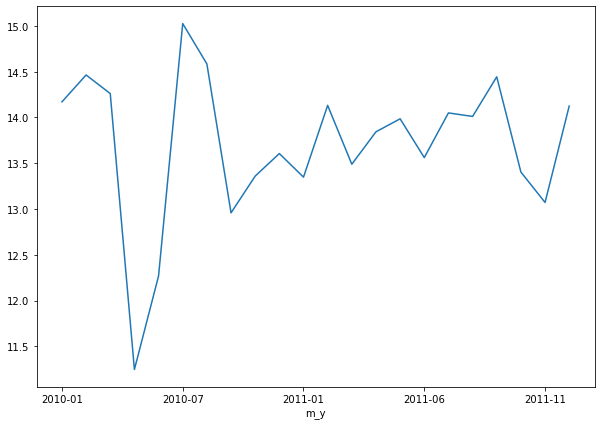

In [133]:

#linegraph of monty vs TotalAmount
fig, ax = plt.subplots(figsize=(10,7))
df.groupby(['m_y'])['TotalAmount'].mean().plot(ax=ax)
plt.show(fig,ax)


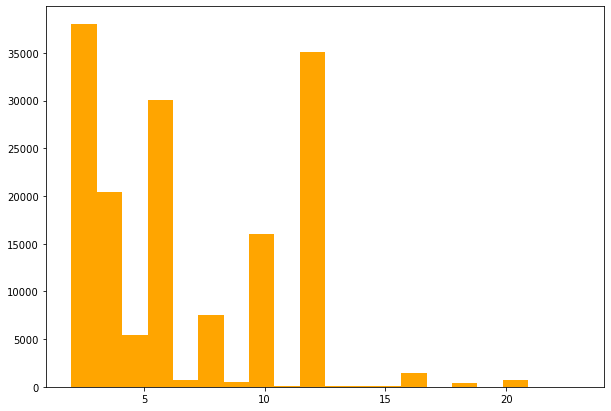

In [134]:


#histogram of quantity
plt.figure(figsize=(10,7))
plt.hist(df['Quantity'],color='orange', bins=20)
plt.show()


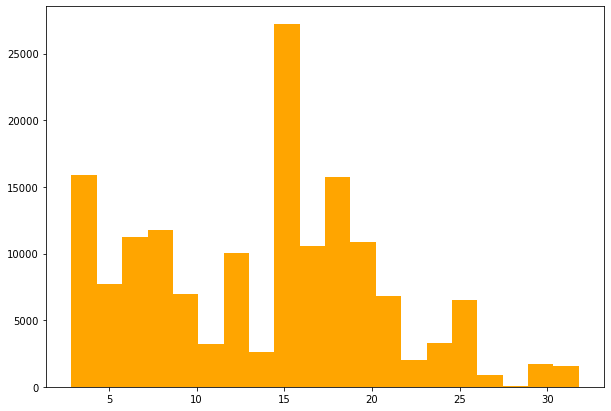

In [135]:

#histogram of TotalAmount
plt.figure(figsize=(10,7))
plt.hist(df['TotalAmount'],color='orange', bins=20)
plt.show()


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


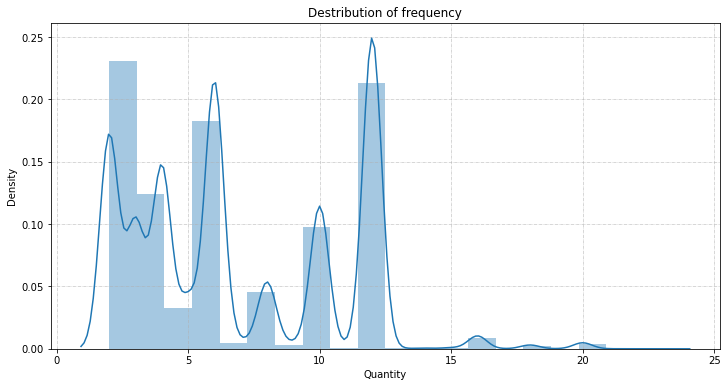

In [136]:


#distplot of quantity
plt.figure(figsize = (12,6))
sns.distplot(df['Quantity'],kde=True,bins=20)
plt.xlabel("Quantity")
plt.title("Destribution of frequency")
plt.grid(linestyle='-.',linewidth = .5)


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


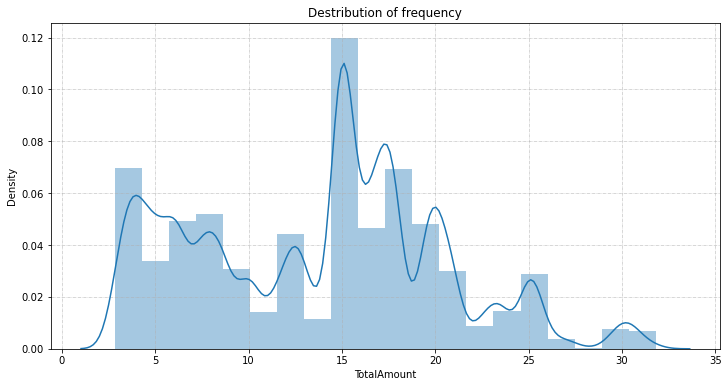

In [137]:
#distplot of TotalAmount
plt.figure(figsize = (12,6))
sns.distplot(df['TotalAmount'],kde=True,bins=20)
plt.xlabel("TotalAmount")
plt.title("Destribution of frequency")
plt.grid(linestyle='-.',linewidth = .5)


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


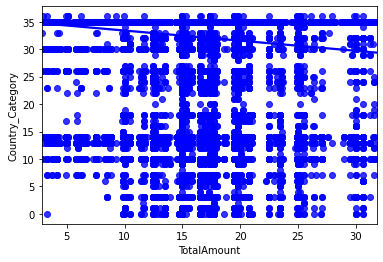

In [138]:
#regplot of country vs total amount
sns.regplot(df['TotalAmount'],df['Country_Category'],color="blue")
plt.show()


Text(0, 0.5, 'Customers')

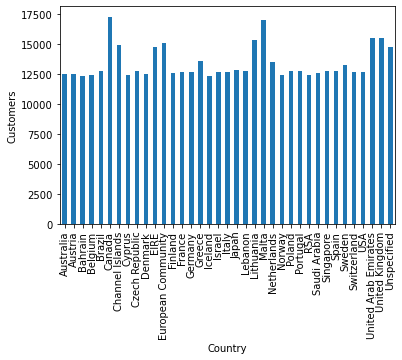

In [139]:
#bargraph of country wise customers
df.groupby(['Country'])['CustomerID'].mean().plot(kind='bar')
plt.ylabel('Customers')



In [140]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,0,3249,3716,6,2010-01-12 08:26:00,2.55,15.30,17850.0,United Kingdom,1,12,2010,8,2010-01,35
1,0,2649,3724,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
2,0,2855,861,8,2010-01-12 08:26:00,2.75,22.00,17850.0,United Kingdom,1,12,2010,8,2010-01,35
3,0,2803,1813,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
4,0,2802,2776,6,2010-01-12 08:26:00,3.39,20.34,17850.0,United Kingdom,1,12,2010,8,2010-01,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541902,18535,1486,3330,12,2011-09-12 12:50:00,1.95,23.40,12680.0,France,9,12,2011,12,2011-09,13
541903,18535,2088,706,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13
541905,18535,1746,695,6,2011-09-12 12:50:00,2.10,12.60,12680.0,France,9,12,2011,12,2011-09,13
541906,18535,2086,701,4,2011-09-12 12:50:00,4.15,16.60,12680.0,France,9,12,2011,12,2011-09,13


<AxesSubplot:>

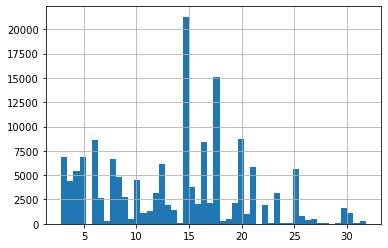

In [141]:
df.TotalAmount.hist(bins=50)


In [142]:
df[['TotalAmount']].describe()


,TotalAmount
count,156799.000000
mean,13.715577
std,6.655425
min,2.850000
25%,7.500000
50%,15.000000
75%,17.700000
max,31.800000


In [143]:
df[df['TotalAmount']> 17.700000].sort_values('TotalAmount',ascending=False)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
52172,1661,1333,1542,12,2011-11-01 08:50:00,2.65,31.80,17450.0,United Kingdom,11,1,2011,8,2011-11,35
375697,13303,1448,629,11,2011-04-10 12:38:00,2.89,31.79,14515.0,United Kingdom,4,10,2011,12,2011-04,35
326851,11655,2142,1388,11,2011-05-09 14:27:00,2.89,31.79,16444.0,United Kingdom,5,9,2011,14,2011-05,35
436432,15277,1587,3086,11,2011-03-11 11:27:00,2.89,31.79,18041.0,United Kingdom,3,11,2011,11,2011-03,35
198800,6978,1576,3089,8,2011-05-22 10:57:00,3.95,31.60,15281.0,United Kingdom,5,22,2011,10,2011-05,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314275,11284,391,1666,6,2011-08-26 11:53:00,2.95,17.70,13644.0,United Kingdom,8,26,2011,11,2011-08,35
116037,3770,1325,2145,6,2011-10-03 10:53:00,2.95,17.70,14334.0,United Kingdom,10,3,2011,10,2011-10,35
413981,14546,989,2323,6,2011-10-24 10:18:00,2.95,17.70,16491.0,United Kingdom,10,24,2011,10,2011-10,35
314244,11282,1756,2328,6,2011-08-26 11:47:00,2.95,17.70,15132.0,United Kingdom,8,26,2011,11,2011-08,35


In [146]:
# checking the date range of our data.
all_dates = (pd.to_datetime(df['InvoiceDate'])).apply(lambda x:x.date())


In [147]:
from dateutil.relativedelta import relativedelta
start_date = all_dates.max()-relativedelta(months=12,days=-1)
print('Start date: {}'.format(start_date))
print('End date: {}'.format(all_dates.max()))

Start date: 2010-12-11
End date: 2011-12-10


In [149]:
data_rfm = df[df['InvoiceDate'] >= pd.to_datetime(start_date)]
data_rfm.reset_index(drop=True,inplace=True)
data_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalAmount,CustomerID,Country,month,day_number,year,hour,m_y,Country_Category
0,848,1335,1618,8,2010-12-12 10:11:00,1.65,13.20,17243.0,United Kingdom,12,12,2010,10,2010-12,35
1,848,1685,1676,5,2010-12-12 10:11:00,4.65,23.25,17243.0,United Kingdom,12,12,2010,10,2010-12,35
2,848,2802,2776,4,2010-12-12 10:11:00,3.75,15.00,17243.0,United Kingdom,12,12,2010,10,2010-12,35
3,848,2804,1152,3,2010-12-12 10:11:00,4.25,12.75,17243.0,United Kingdom,12,12,2010,10,2010-12,35
4,848,3144,1483,4,2010-12-12 10:11:00,3.75,15.00,17243.0,United Kingdom,12,12,2010,10,2010-12,35


In [150]:
snapshot_date = max(data_rfm.InvoiceDate) + dt.timedelta(days=1)
print('Snapshot date: {}'.format(snapshot_date.date()))

Snapshot date: 2011-12-11


In [186]:
# Aggregate data on a customer level
data = data_rfm.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count','TotalAmount': 'sum'}).rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency','TotalAmount': 'Monetary'})


In [187]:
data.head()


,CustomerID,Recency,Frequency,Monetary
0,12347.0,41,80,1495.66
1,12349.0,20,39,705.55
2,12350.0,312,13,255.30
3,12352.0,74,45,782.09
4,12353.0,205,2,29.30


In [188]:
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(data['Recency'], 4, labels = r_labels)
data = data.assign(R = r_quartiles.values)

In [189]:
f_labels = range(1,5)
m_labels = range(1,5)

In [190]:
f_quartiles = pd.qcut(data['Frequency'], 4, labels = f_labels)


In [191]:
m_quartiles = pd.qcut(data['Monetary'], 4, labels = m_labels)


In [192]:
data = data.assign(F = f_quartiles.values)


In [193]:
data = data.assign(M = m_quartiles.values)


In [194]:
data.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12347.0,41,80,1495.66,3,4,4
1,12349.0,20,39,705.55,4,3,4
2,12350.0,312,13,255.30,1,2,3
3,12352.0,74,45,782.09,2,4,4
4,12353.0,205,2,29.30,1,1,1


In [195]:
data['RFM_Score'] = data[['R','F','M']].sum(axis=1)


In [196]:
data.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12347.0,41,80,1495.66,3,4,4,11
1,12349.0,20,39,705.55,4,3,4,11
2,12350.0,312,13,255.30,1,2,3,6
3,12352.0,74,45,782.09,2,4,4,10
4,12353.0,205,2,29.30,1,1,1,3


In [197]:
# analyse RFM Score distribution and groups.
data.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean', 'count'] })

Recency   Frequency     Monetary      
                 mean        mean         mean count
RFM_Score                                           
3          247.670213    3.534574    51.309122   376
4          160.567335    5.467049    69.391375   349
5          153.686364    8.063636   121.117932   440
6          107.685185   11.004630   152.163542   432
7          106.644068   16.767554   235.952446   413
8           75.948276   22.842365   329.800172   406
9           58.917614   32.502841   454.499063   352
10          47.365729   54.196931   755.362941   391
11          31.005362   84.919571  1176.034370   373
12          11.565854  143.204878  1906.333976   410

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

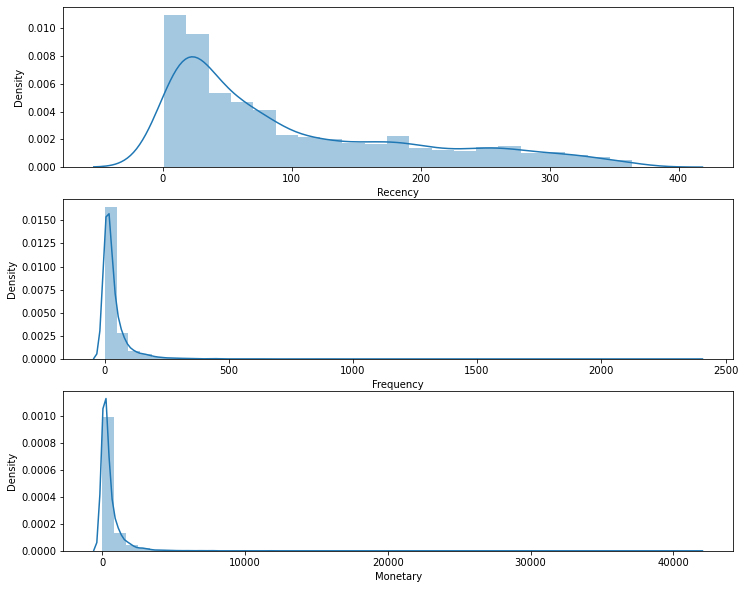

In [198]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1); sns.distplot(data['Recency'])
plt.subplot(3, 1, 2); sns.distplot(data['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(data['Monetary'])

In [200]:
# Checking for constant mean and variance.
data[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3942.000000,3942.000000,3942.000000
mean,99.885591,38.244292,524.980193
std,95.282544,77.443201,1040.852555
min,1.000000,1.000000,2.850000
25%,23.000000,7.000000,103.617500
50%,62.000000,17.000000,246.205000
75%,160.000000,42.750000,606.460000
max,364.000000,2363.000000,41436.030000


In [201]:
raw_data = data[['Recency','Frequency','Monetary']]


In [202]:
# applying log transformation to the data and normalize it.

# Unskew the data
data_log = np.log(raw_data)



In [203]:
# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(data_log)


StandardScaler()

In [354]:
data_normalized = scaler.transform(data_log)


In [509]:
data_norm = pd.DataFrame(data=data_log, index=raw_data.index, columns=raw_data.columns)


In [510]:
data_norm

,Recency,Frequency,Monetary
0,3.713572,4.382027,7.310323
1,2.995732,3.663562,6.558978
2,5.743003,2.564949,5.542439
3,4.304065,3.806662,6.661970
4,5.323010,0.693147,3.377588
...,...,...,...
3937,5.081404,1.791759,4.647271
3938,1.609438,0.693147,3.459466
3939,5.379897,1.609438,4.476768
3940,2.397895,5.303305,6.956107


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

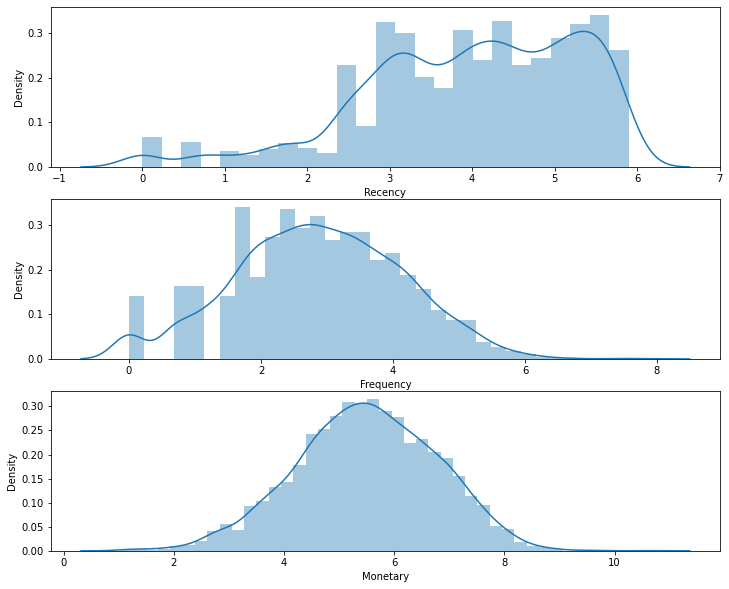

In [511]:
# Checking for skewness in the data
plt.figure(figsize=(12,10))

plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

plt.subplot(3, 1, 3); sns.distplot(data_norm['Monetary'])

# Show the plot
plt.show()


### clustering K-means

In [512]:
data_norm

,Recency,Frequency,Monetary
0,3.713572,4.382027,7.310323
1,2.995732,3.663562,6.558978
2,5.743003,2.564949,5.542439
3,4.304065,3.806662,6.661970
4,5.323010,0.693147,3.377588
...,...,...,...
3937,5.081404,1.791759,4.647271
3938,1.609438,0.693147,3.459466
3939,5.379897,1.609438,4.476768
3940,2.397895,5.303305,6.956107


In [513]:
from sklearn.cluster import KMeans


In [514]:
sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(2, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

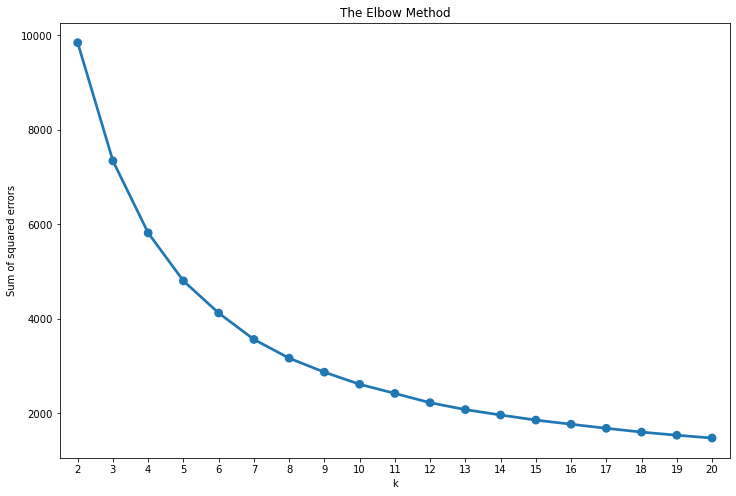

In [515]:
plt.figure(figsize=(12,8))

plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [516]:
kmeans = KMeans(n_clusters=5, random_state=1)

kmeans.fit(data_norm)


KMeans(n_clusters=5, random_state=1)

In [1]:
cluster_labels = kmeans.labels_
cluster_labels

NameError: name 'kmeans' is not defined

In [518]:
data_norm_k = data_norm.assign(Cluster = cluster_labels)

In [519]:
data_k = raw_data.assign(Cluster = cluster_labels)


In [520]:
# Calculate average RFM values and size for each cluster
summary_k = data_k.groupby(['Cluster']).agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean', 'count'],})

summary_k

Recency   Frequency     Monetary      
               mean        mean         mean count
Cluster                                           
0         21.843195   15.519231   211.616760   676
1         15.860908  121.736457  1645.010190   683
2        179.676182   11.209634   159.474130  1121
3         89.901207   47.243688   662.284621   911
4        153.961887    2.753176    37.686461   551

In [528]:
data_norm_k.index= data['CustomerID'].astype(int)

In [529]:
data_norm_k

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347,3.713572,4.382027,7.310323,3
12349,2.995732,3.663562,6.558978,1
12350,5.743003,2.564949,5.542439,2
12352,4.304065,3.806662,6.661970,3
12353,5.323010,0.693147,3.377588,4
...,...,...,...,...
18280,5.081404,1.791759,4.647271,2
18281,1.609438,0.693147,3.459466,0
18282,5.379897,1.609438,4.476768,2


<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

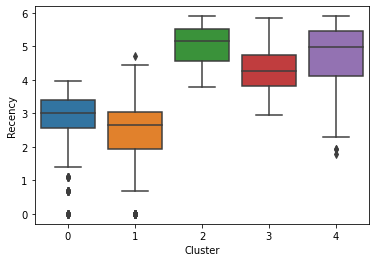

In [530]:
sns.boxplot(x='Cluster', y='Recency', data=data_norm_k)

<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

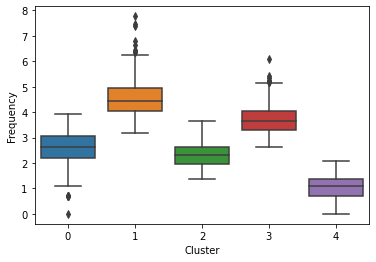

In [531]:
sns.boxplot(x='Cluster', y='Frequency', data=data_norm_k)

<AxesSubplot:xlabel='Cluster', ylabel='Monetary'>

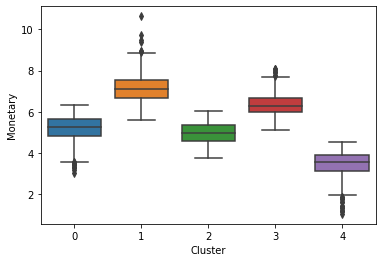

In [532]:
sns.boxplot(x='Cluster', y='Monetary', data=data_norm_k)

In [533]:
data_norm_k["RecencyScore"] = pd.qcut(data_norm_k["Recency"], q=5, labels=[5,4,3,2,1])

In [534]:
data_norm_k["FrequencyScore"] = pd.qcut(data_norm_k["Frequency"].rank(method="first"), q=5, labels=[1,2,3,4,5])

In [535]:
data_norm_k["MonetaryScore"] = pd.qcut(data_norm_k["Monetary"], q=5, labels=[5,4,3,2,1])


In [536]:
data_norm_k["RFM_SCORE"] = (data_norm_k["RecencyScore"].astype(str) + data_norm_k["FrequencyScore"].astype(str))


In [537]:
data_norm_k

,Recency,Frequency,Monetary,Cluster,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,,
12347,3.713572,4.382027,7.310323,3,4,5,1,45
12349,2.995732,3.663562,6.558978,1,4,4,2,44
12350,5.743003,2.564949,5.542439,2,1,2,3,12
12352,4.304065,3.806662,6.661970,3,3,4,1,34
12353,5.323010,0.693147,3.377588,4,1,1,5,11
...,...,...,...,...,...,...,...,...
18280,5.081404,1.791759,4.647271,2,2,2,4,22
18281,1.609438,0.693147,3.459466,0,5,1,5,51
18282,5.379897,1.609438,4.476768,2,1,1,4,11


In [538]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [539]:
## RFM Segments
data_norm_k["Segment"] = data_norm_k["RFM_SCORE"].replace(seg_map, regex=True)


In [540]:
data_norm_k

,Recency,Frequency,Monetary,Cluster,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,,
12347,3.713572,4.382027,7.310323,3,4,5,1,45,loyal_customers
12349,2.995732,3.663562,6.558978,1,4,4,2,44,loyal_customers
12350,5.743003,2.564949,5.542439,2,1,2,3,12,hibernating
12352,4.304065,3.806662,6.661970,3,3,4,1,34,loyal_customers
12353,5.323010,0.693147,3.377588,4,1,1,5,11,hibernating
...,...,...,...,...,...,...,...,...,...
18280,5.081404,1.791759,4.647271,2,2,2,4,22,hibernating
18281,1.609438,0.693147,3.459466,0,5,1,5,51,new_customers
18282,5.379897,1.609438,4.476768,2,1,1,4,11,hibernating


In [541]:
data_norm_k["Segment"].value_counts()

hibernating            932
loyal_customers        730
at_Risk                553
champions              538
potential_loyalists    466
about_to_sleep         290
need_attention         182
promising               94
cant_loose              91
new_customers           66
Name: Segment, dtype: int64

In [542]:
# Grouping RFM mean and frequency values by segment for dataframe review
data_norm_k[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])


Recency       Frequency        Monetary      
                         mean count      mean count      mean count
Segment                                                            
about_to_sleep       4.144600   290  1.680714   290  4.412158   290
at_Risk              5.156427   553  3.108564   553  5.701811   553
cant_loose           4.945938    91  4.432269    91  6.991710    91
champions            2.064898   538  4.322922   538  6.924586   538
hibernating          5.275276   932  1.565375   932  4.233062   932
loyal_customers      3.667748   730  4.048940   730  6.638201   730
need_attention       4.163610   182  2.853606   182  5.562086   182
new_customers        2.126385    66  1.135241    66  3.748799    66
potential_loyalists  2.796772   466  2.596085   466  5.243108   466
promising            3.379632    94  1.110125    94  3.908523    94

In [560]:
data_norm_k["Cluster"] = data_norm_k["Cluster"] + 1 # we don't want it to start with 0


In [561]:
data_norm_k.groupby("Cluster").agg({"Cluster": "count"})


,Cluster
Cluster,
1,676
2,683
3,1121
4,911
5,551


In [562]:
for i in data_norm_k["Cluster"]:
    data_norm_k[data_norm_k["Cluster"] == i]

In [564]:
data_norm_k.groupby("Cluster").agg(np.mean) # A look at descriptive statistics


,Recency,Frequency,Monetary
Cluster,,,
1,2.824359,2.576734,5.193993
2,2.404187,4.514239,7.150967
3,5.048209,2.306776,4.964213
4,4.285643,3.703221,6.352204
5,4.742207,0.860161,3.464283


In [565]:
data_norm_k

,Recency,Frequency,Monetary,Cluster,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,,
12347,3.713572,4.382027,7.310323,4,4,5,1,45,loyal_customers
12349,2.995732,3.663562,6.558978,2,4,4,2,44,loyal_customers
12350,5.743003,2.564949,5.542439,3,1,2,3,12,hibernating
12352,4.304065,3.806662,6.661970,4,3,4,1,34,loyal_customers
12353,5.323010,0.693147,3.377588,5,1,1,5,11,hibernating
...,...,...,...,...,...,...,...,...,...
18280,5.081404,1.791759,4.647271,3,2,2,4,22,hibernating
18281,1.609438,0.693147,3.459466,1,5,1,5,51,new_customers
18282,5.379897,1.609438,4.476768,3,1,1,4,11,hibernating


In [580]:
data_norm_k[["Segment","Recency","Frequency","Monetary"]].groupby("Segment").agg(["min","max","mean","count"])



Recency                           Frequency            \
                          min       max      mean count       min       max   
Segment                                                                       
about_to_sleep       3.806662  4.465908  4.144600   290  0.000000  2.564949   
at_Risk              4.477337  5.897154  5.156427   553  2.564949  3.970292   
cant_loose           4.477337  5.723585  4.945938    91  3.970292  6.089045   
champions            0.000000  2.944439  2.064898   538  3.218876  7.767687   
hibernating          4.477337  5.897154  5.275276   932  0.000000  2.564949   
loyal_customers      2.995732  4.465908  3.667748   730  3.218876  6.091310   
need_attention       3.806662  4.465908  4.163610   182  2.564949  3.218876   
new_customers        0.000000  2.944439  2.126385    66  0.000000  1.791759   
potential_loyalists  0.000000  3.784190  2.796772   466  1.791759  3.178054   
promising            2.995732  3.784190  3.379632    94  0.000000  1.791759   

                                     Monetary                             
                         mean count       min        max      mean count  
Segment                                                                   
about_to_sleep       1.680714   290  2.014903   5.590838  4.412158   290  
at_Risk              3.108564   553  4.099829   6.947706  5.701811   553  
cant_loose           4.432269    91  5.815085   8.941070  6.991710    91  
champions            4.322922   538  5.103458  10.631906  6.924586   538  
hibernating          1.565375   932  1.047319   5.542439  4.233062   932  
loyal_customers      4.048940   730  4.790903   8.841286  6.638201   730  
need_attention       2.853606   182  4.192680   6.131422  5.562086   182  
new_customers        1.135241    66  1.774952   4.839451  3.748799    66  
potential_loyalists  2.596085   466  3.267666   6.268528  5.243108   466  
promising            1.110125    94  1.425515   4.764735  3.908523    94